<a href="https://colab.research.google.com/github/1pk73/homework1/blob/master/Auto_MpG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
from sklearn.model_selection import train_test_split

In [0]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'



In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [0]:
data = pd.read_csv(url,names=column_names,sep=' ',comment='\t',skipinitialspace=True,na_values='?')

In [0]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [0]:
data.isna().sum(axis=0)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
data = data.dropna()

In [0]:
data.isna().sum(axis=0)

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
origin = data.pop('Origin')

In [0]:
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0



In [0]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [0]:

print(data.shape)

(392, 10)


In [0]:
train = data.sample(frac=0.8,random_state=0)
test = data.drop(train.index)

In [0]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


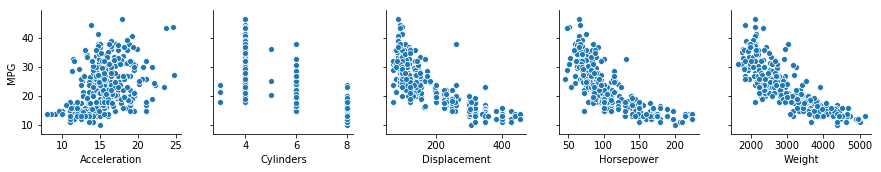

In [0]:
sns.pairplot(train,diag_kind='kde',y_vars=['MPG'],x_vars=['Acceleration','Cylinders','Displacement','Horsepower','Weight'])

In [0]:
train_labels = train.pop('MPG')
test_labels = test.pop('MPG')

In [0]:
#Normalization
train_stats = train.describe()

In [0]:

train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
norm_train = norm(train)
norm_test = norm(test)

In [0]:
norm_train.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02
mean,2.093159e-16,1.018294e-16,-1.909301e-17,-9.723291e-17,2.688832e-15,9.561531e-16,6.081476e-17,8.485781e-18,3.164489e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.457657e+00,-1.220325e+00,-1.545283e+00,-1.589352e+00,-2.710152e+00,-1.604642e+00,-1.286751e+00,-4.651484e-01,-4.952254e-01
25%,-8.693480e-01,-8.608943e-01,-7.512407e-01,-8.694784e-01,-6.307245e-01,-7.884578e-01,-1.286751e+00,-4.651484e-01,-4.952254e-01
50%,-8.693480e-01,-4.247848e-01,-2.721905e-01,-1.987817e-01,-2.123729e-02,2.772599e-02,7.746764e-01,-4.651484e-01,-4.952254e-01
75%,1.483887e+00,6.750739e-01,6.071620e-01,7.320173e-01,5.882500e-01,8.439098e-01,7.746764e-01,-4.651484e-01,-4.952254e-01
max,1.483887e+00,2.489002e+00,3.153347e+00,2.547401e+00,3.313017e+00,1.660094e+00,7.746764e-01,2.143005e+00,2.012852e+00


In [0]:
model = tf.keras.Sequential([
                             layers.Dense(64,activation='relu',input_shape=[len(train.keys())]),
                             layers.Dense(64,activation='relu'),
                             layers.Dense(1)

])

In [0]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [0]:
train_labels.shape

(314,)

In [0]:
norm_train,val,train_labels,val_labels = train_test_split(norm_train,train_labels,test_size=0.15)

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [0]:
model.fit(norm_train,train_labels,epochs=1000,batch_size=32,validation_data=(val,val_labels),callbacks=[early_stopping])


Train on 266 samples, validate on 48 samples
Epoch 1/1000
266/266 [==============================] - 0s 506us/sample - loss: 579.6092 - mean_squared_error: 579.6093 - mean_absolute_error: 22.7950 - val_loss: 490.9932 - val_mean_squared_error: 490.9932 - val_mean_absolute_error: 20.9583
Epoch 2/1000
266/266 [==============================] - 0s 104us/sample - loss: 542.8643 - mean_squared_error: 542.8643 - mean_absolute_error: 21.9407 - val_loss: 452.0527 - val_mean_squared_error: 452.0527 - val_mean_absolute_error: 19.9663
Epoch 3/1000
266/266 [==============================] - 0s 107us/sample - loss: 500.1396 - mean_squared_error: 500.1396 - mean_absolute_error: 20.9008 - val_loss: 404.9029 - val_mean_squared_error: 404.9029 - val_mean_absolute_error: 18.7083
Epoch 4/1000
266/266 [==============================] - 0s 137us/sample - loss: 445.7560 - mean_squared_error: 445.7560 - mean_absolute_error: 19.5381 - val_loss: 347.2407 - val_mean_squared_error: 347.2407 - val_mean_absolute_er

In [0]:
predictions = model.predict(norm_test)

In [0]:
predictions = predictions.flatten()

In [0]:
loss,mae,mse = model.evaluate(norm_test,test_labels)

78/78 [==============================] - 0s 84us/sample - loss: 6.1760 - mean_squared_error: 6.1760 - mean_absolute_error: 1.8847


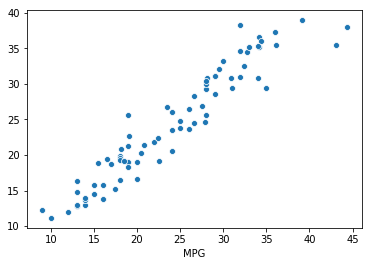

In [0]:
sns.scatterplot(test_labels,predictions,)
